# Syed Muhammad Zain Computer Vision Deep Learning Model


## Importing libraries

In [27]:
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import *
from keras.utils import np_utils
from keras.optimizers import Ftrl
from tqdm import tqdm
import seaborn as sns

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory Data Analysis

In [3]:
Train_data1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CV emnist project/EMNIST data set/emnist-balanced-train.csv', header=None)

In [29]:
Train_data1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
Train_data1.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
112795,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112796,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112797,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112798,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112799,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
Train_data1.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
780    0
781    0
782    0
783    0
784    0
Length: 785, dtype: int64

In [32]:
Train_data1.describe()#summary statistics

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
count,112800.00000,112800.0,112800.0,112800.0,112800.0,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.0,112800.0,112800.0,112800.0,112800.0,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,...,112800.00000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.0,112800.0,112800.0,112800.000000,112800.000000,112800.00000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.000000,112800.00000,112800.000000,112800.0,112800.0,112800.000000,112800.000000,112800.0,112800.0,112800.0,112800.0,112800.0
mean,23.00000,0.0,0.0,0.0,0.0,0.001365,0.011560,0.020700,0.017438,0.018475,0.015656,0.006800,0.005168,0.005408,0.002163,0.006817,0.011383,0.012766,0.011099,0.009583,0.004734,0.004504,0.003644,0.001986,0.000718,0.0,0.0,0.0,0.0,0.0,0.000177,0.005071,0.023555,0.059592,0.137757,0.222447,0.273892,0.273245,0.246649,0.200426,...,0.20703,0.202083,0.181915,0.149016,0.125904,0.095904,0.068590,0.053910,0.036569,0.013050,0.000887,0.0,0.0,0.0,0.000018,0.002872,0.00602,0.002305,0.000496,0.001986,0.002624,0.008271,0.001401,0.001126,0.002376,0.002296,0.002092,0.002305,0.002252,0.00195,0.000310,0.0,0.0,0.002163,0.000284,0.0,0.0,0.0,0.0,0.0
std,13.56472,0.0,0.0,0.0,0.0,0.235046,1.221826,1.658797,1.602478,1.719549,1.614498,0.832286,0.835550,0.933277,0.458119,0.821964,1.243055,1.333679,1.366935,1.075970,0.778274,0.987487,0.758136,0.447825,0.192524,0.0,0.0,0.0,0.0,0.0,0.026631,0.284393,0.754907,1.355090,2.916596,4.115672,4.595471,4.416621,4.059579,3.342224,...,3.24580,3.127949,2.892978,2.405203,2.258822,1.934298,1.442394,1.305094,1.095758,0.646754,0.078546,0.0,0.0,0.0,0.005955,0.647920,1.00000,0.535526,0.097121,0.465225,0.653561,1.253601,0.284684,0.363408,0.688622,0.476157,0.602667,0.612038,0.729969,0.65504,0.104211,0.0,0.0,0.726499,0.095279,0.0,0.0,0.0,0.0,0.0
min,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,11.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,23.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [33]:
Train_data1.shape

(112800, 785)

In [34]:
#splitting data into xtrain and ytrain
trainingy=Train_data1[[0]]
trainingx=Train_data1.drop([0],axis=1)
print(trainingy.shape)
print(trainingx.shape)

(112800, 1)
(112800, 784)


In [35]:
trainingy.head()

,0
0,45
1,36
2,43
3,15
4,4


In [36]:
trainingx.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


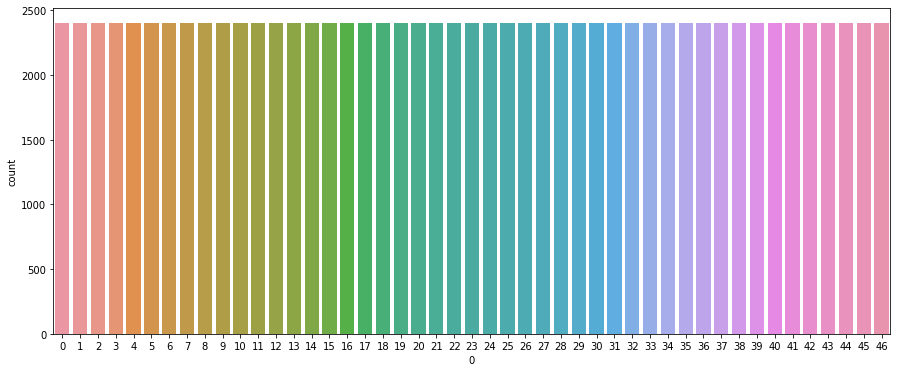

In [37]:
plt.figure(figsize=(15,6))
sns.countplot(x=0,data=trainingy)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


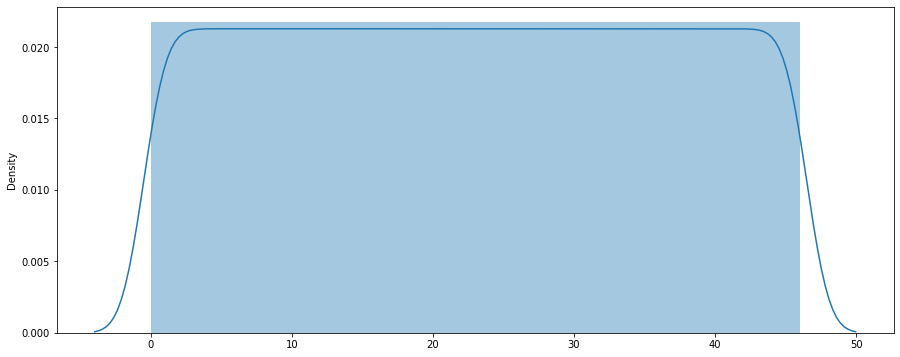

In [38]:
plt.figure(figsize=(15,6))
sns.distplot(trainingy)

In [39]:
#converting to series
trainingy=Train_data1[0]
trainingy.shape

(112800,)

In [40]:
mapping=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CV emnist project/EMNIST data set/emnist-balanced-mapping.txt", 
                        delimiter = ' ', 
                        index_col=0, 
                        header=None, 
                        squeeze=True)
mapping.head()

0
0    48
1    49
2    50
3    51
4    52
Name: 1, dtype: int64

In [41]:
mappingdict = {}
for i,L in enumerate(mapping):
    mappingdict[i] = chr(L)

mappingdict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [42]:
IFP1=trainingx.loc[4]
LFP1=trainingy.loc[4]
IFP2=trainingx.loc[25]
LFP2=trainingy.loc[25]
IFP3=trainingx.loc[46]
LFP3=trainingy.loc[46]
IFP4=trainingx.loc[35]
LFP4=trainingy.loc[35]
IFP5=trainingx.loc[8]
LFP5=trainingy.loc[8]

In [43]:
IFP1.shape#means 28x28

(784,)

4


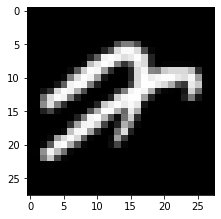

3


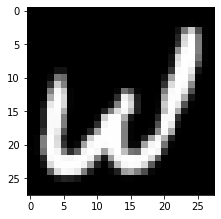

t


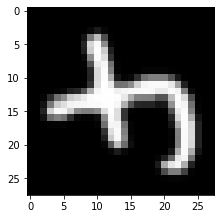

Z


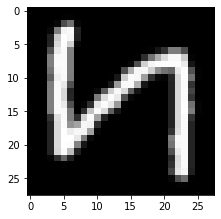

K


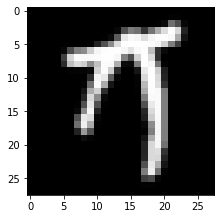

In [44]:
plt.figure(figsize=(20,20))
plt.subplot(5,1,1)
print(mappingdict[LFP1])
plt.imshow(IFP1.values.reshape(28,28),cmap='gray')
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(5,1,2)
print(mappingdict[LFP2])
plt.imshow(IFP2.values.reshape(28,28),cmap='gray')
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(5,1,3)
print(mappingdict[LFP3])
plt.imshow(IFP3.values.reshape(28,28),cmap='gray')
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(5,1,4)
print(mappingdict[LFP4])
plt.imshow(IFP4.values.reshape(28,28),cmap='gray')
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(5,1,5)
print(mappingdict[LFP5])
plt.imshow(IFP5.values.reshape(28,28),cmap='gray')
plt.show()

In [45]:
def correctingimage(imageforcorrection):
    imageforcorrection = imageforcorrection.reshape(28, 28)
    imageforcorrection = np.fliplr(imageforcorrection)
    imageforcorrection = np.rot90(imageforcorrection)
    return imageforcorrection

In [46]:
trainingx = np.apply_along_axis(correctingimage, 1, trainingx)
trainingx.shape

(112800, 28, 28)

4


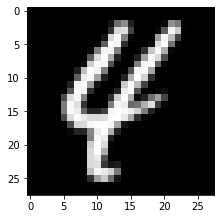

3


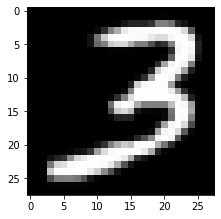

t


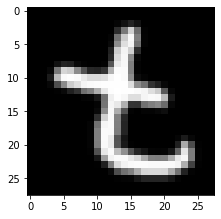

Z


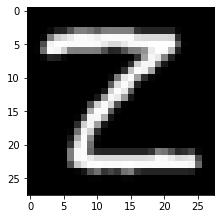

K


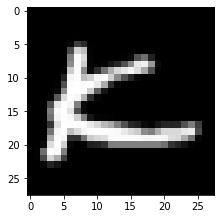

In [47]:
IFP1=trainingx[4]
LFP1=trainingy.loc[4]
IFP2=trainingx[25]
LFP2=trainingy.loc[25]
IFP3=trainingx[46]
LFP3=trainingy.loc[46]
IFP4=trainingx[35]
LFP4=trainingy.loc[35]
IFP5=trainingx[8]
LFP5=trainingy.loc[8]
plt.figure(figsize=(20,20))
plt.subplot(5,1,1)
print(mappingdict[LFP1])
plt.imshow(IFP1.reshape(28,28),cmap='gray')
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(5,1,2)
print(mappingdict[LFP2])
plt.imshow(IFP2.reshape(28,28),cmap='gray')
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(5,1,3)
print(mappingdict[LFP3])
plt.imshow(IFP3.reshape(28,28),cmap='gray')
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(5,1,4)
print(mappingdict[LFP4])
plt.imshow(IFP4.reshape(28,28),cmap='gray')
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(5,1,5)
print(mappingdict[LFP5])
plt.imshow(IFP5.reshape(28,28),cmap='gray')
plt.show()

In [48]:
#normalizing x and one hot encoding y both are not dataframes
trainingx = trainingx.astype('float32') / 255
NOL=trainingy.nunique()#numberofthelabels
trainingy = np_utils.to_categorical(trainingy, NOL)
trainingx=trainingx.reshape(-1,28,28,1)#batch size first than width than height than channels
print(trainingy.shape)
print(trainingx.shape)

(112800, 47)
(112800, 28, 28, 1)


In [49]:
#same for testining 
test_data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CV emnist project/EMNIST data set/emnist-balanced-test.csv', header=None)
test_data1.shape
XTest=test_data1.drop(0,axis=1)
YTest=test_data1[0]
print(XTest.shape)
print(YTest.shape)
XTest=np.apply_along_axis(correctingimage, 1, XTest)
YTest=np_utils.to_categorical(YTest, NOL)
print(XTest.shape)
print(YTest.shape)
XTest = XTest.astype('float32') / 255
XTest= XTest.reshape(-1, 28, 28, 1)
print(XTest.shape)

(18800, 784)
(18800,)
(18800, 28, 28)
(18800, 47)
(18800, 28, 28, 1)


## Training and testing

In [50]:
from sklearn.model_selection import train_test_split
XT,XV,YT,YV = train_test_split(trainingx,trainingy,test_size=0.2,random_state=44)                                                

In [51]:
ConvModel= tf.keras.models.Sequential()
# add convolutional and pooling layer
ConvModel.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, activation='relu',padding='same',input_shape=[28, 28, 1]))
ConvModel.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
ConvModel.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'))
ConvModel.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
ConvModel.add(tf.keras.layers.Dropout(0.2))
ConvModel.add(tf.keras.layers.Flatten())
ConvModel.add(tf.keras.layers.BatchNormalization())
ConvModel.add(tf.keras.layers.Dense(NOL,activation='softmax'))
ConvModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        3216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 400)              

In [52]:
Opti=Ftrl(lr=0.001)
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
ROP = ReduceLROnPlateau(monitor='val_loss', factor=0.5,patience=1,min_lr=0.00001)
EarlyS=EarlyStopping( monitor='val_loss',patience=1,mode="min")
saving_best_model_weights=mcp_save = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/CV emnist project/CVmodel.h5', save_best_only=True, monitor='val_loss', mode='auto')

In [53]:
ConvModel.compile(loss='categorical_crossentropy', optimizer=Opti, metrics=['accuracy'])

In [54]:
ModelDataS=ConvModel.fit(XT,YT,epochs=35,batch_size=128,validation_split=0.15,callbacks=[EarlyS,saving_best_model_weights,ROP])

Epoch 1/35
600/600 [==============================] - 31s 50ms/step - loss: 3.8587 - accuracy: 0.0197 - val_loss: 3.8502 - val_accuracy: 0.0218
Epoch 2/35
600/600 [==============================] - 29s 49ms/step - loss: 3.8501 - accuracy: 0.0207 - val_loss: 3.8502 - val_accuracy: 0.0218


In [ ]:
from keras.models import load_model

In [ ]:
final_mod=load_model('/content/drive/MyDrive/Colab Notebooks/CV emnist project/CVmodel.h5')

In [ ]:
predictiony=final_mod.predict(XV)

In [ ]:
predictiony.shape

In [ ]:
plt.imshow(XV[0].reshape(28, 28), cmap='gray')
print(mappingdict[predictiony[0].argmax()])
plt.show()
plt.imshow(XV[4].reshape(28, 28), cmap='gray')
print(mappingdict[predictiony[4].argmax()])
plt.show()
plt.imshow(XV[6].reshape(28, 28), cmap='gray')
print(mappingdict[predictiony[6].argmax()])
plt.show()
plt.imshow(XV[29].reshape(28, 28), cmap='gray')
print(mappingdict[predictiony[29].argmax()])
plt.show()
plt.imshow(XV[31].reshape(28, 28), cmap='gray')
print(mappingdict[predictiony[31].argmax()])
plt.show()
plt.imshow(XV[44].reshape(28, 28), cmap='gray')
print(mappingdict[predictiony[44].argmax()])
plt.show()
plt.imshow(XV[53].reshape(28, 28), cmap='gray')
print(mappingdict[predictiony[53].argmax()])
plt.show()
plt.imshow(XV[61].reshape(28, 28), cmap='gray')
print(mappingdict[predictiony[61].argmax()])
plt.show()
plt.imshow(XV[75].reshape(28, 28), cmap='gray')
print(mappingdict[predictiony[75].argmax()])
plt.show()
plt.imshow(XV[89].reshape(28, 28), cmap='gray')
print(mappingdict[predictiony[89].argmax()])
plt.show()
plt.imshow(XV[101].reshape(28, 28), cmap='gray')
print(mappingdict[predictiony[101].argmax()])
plt.show()

In [ ]:
final_mod.evaluate(XV,YV)

In [ ]:
final_mod.evaluate(XTest,YTest)

In [ ]:
trainingaccuracy = ModelDataS.history['accuracy']
validaccuracy=ModelDataS.history['val_accuracy']
trainloss = ModelDataS.history['loss']
validloss = ModelDataS.history['val_loss']
epochs=range(1,len(trainingaccuracy)+1)

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(epochs,trainingaccuracy,'r')
plt.plot(epochs,validaccuracy,'b')
plt.plot(epochs,trainloss,'g')
plt.plot(epochs,validloss,'y')
plt.legend(['TrainAcc', 'ValidationAcc','TrainLoss','Validationloss'], loc='upper right')
plt.xlabel('epochs')
plt.ylabel('data for validation,train loss and accuracy')